# 利用机器学习测试点到

In [34]:
# importing packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import imblearn
from palettable.colorbrewer.qualitative import Pastel1_3


## EDA 探索性数据分析

In [48]:
df = pd.read_csv('data_till_week15.csv', encoding='gbk')
df_test=pd.read_csv('data_till_week_test.csv', encoding='gbk')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,2,1,1,2,3,1,4,1,3,2,1,3,1
1,3,1,2,2,3,1,4,1,4,2,2,3,1
2,4,2,2,2,3,1,3,1,3,1,2,3,1
3,5,2,1,2,2,1,4,1,2,1,2,3,1
4,6,1,1,2,2,1,4,1,4,1,1,4,1


In [49]:
print(df.shape)

(144, 13)


In [50]:
# 计算出每个特征有多少百分比是缺失的
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

In [51]:
missing_value_df.sort_values(by='percent_missing', ascending=False).head(10)

,column_name,percent_missing
x1,x1,0.0
x2,x2,0.0
x3,x3,0.0
x4,x4,0.0
x5,x5,0.0
x6,x6,0.0
x7,x7,0.0
x8,x8,0.0
x9,x9,0.0
x10,x10,0.0


### 多少人通过Speed Dating找到了对象

[128  16]


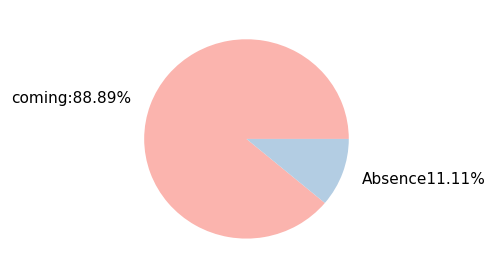

In [52]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df.y.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'coming:' + str(single_percentage) + '%',
    'Absence' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()


## 模型构建

### 数据准备

In [53]:
# preparing the data
clean_df = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','y']]
# print(clean_df.shape)
clean_df.dropna(inplace=True)
# print(clean_df.shape)
X=clean_df[['x2','x3','x4','x5','x6','x8','x9','x10','x11']]
y=clean_df['y']
x_Test=df_test[['x2','x3','x4','x5','x6','x8','x9','x10','x11']]
y_Test=df_test['y']

print(X.shape,y.shape)


(144, 9) (144,)


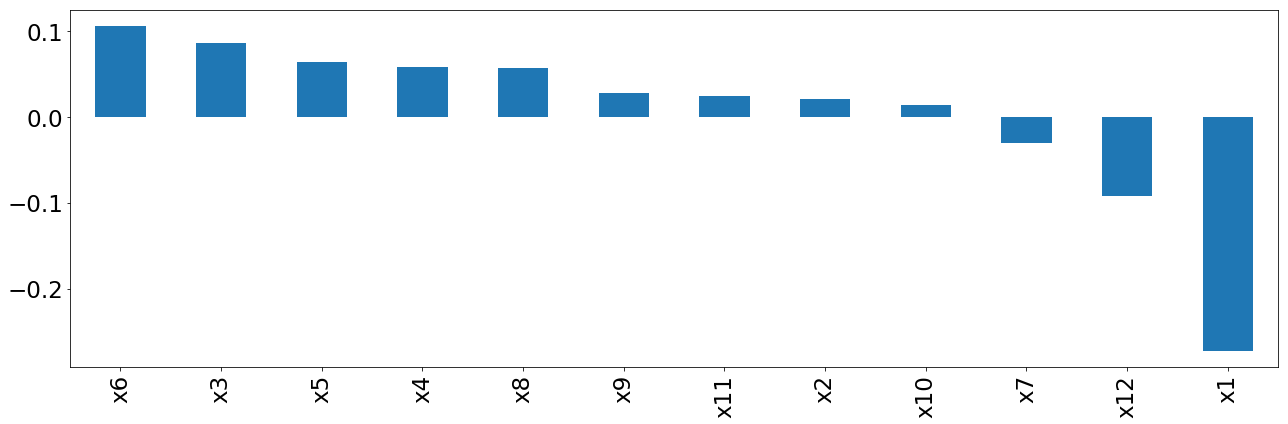

In [54]:
corr = clean_df.corr('pearson')
plt.figure(figsize=(18,6))
plt.tick_params(labelsize=23)
corr['y'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.tight_layout()

In [55]:
oversample = imblearn.over_sampling.SVMSMOTE()
X, y = oversample.fit_resample(X, y)

[128  74]


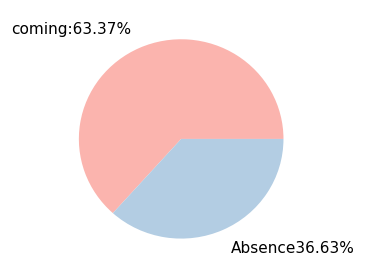

In [56]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=y.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'coming:' + str(single_percentage) + '%',
    'Absence' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)

(202, 9) (202,)
(161, 9) (161,)


In [58]:
y_train

8      1
157   -1
34    -1
94     1
75     1
      ..
68     1
163   -1
91     1
29     1
48     1
Name: y, Length: 161, dtype: int64

### 模型训练

### 测试结果

In [60]:
dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train, y_train)
print(cross_val_score(dtc, X_train, y_train, cv=5))

pre_test=dtc.predict(x_Test)
print("acc:{} recall:{} precision:{} f1:{}".format(metrics.accuracy_score(y_Test,pre_test), 
                                                    metrics.recall_score(y_Test, pre_test),
                                                    metrics.precision_score(y_Test,pre_test),
                                                    metrics.f1_score(y_Test,pre_test)))

[0.87878788 0.8125     0.8125     0.78125    0.78125   ]
acc:0.7647058823529411 recall:0.8 precision:0.9230769230769231 f1:0.8571428571428571


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf=MLPClassifier(random_state=1, max_iter=10000, verbose=1, learning_rate='adaptive')
cross_val_score(clf, X_train, y_train, cv=20)
clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

, loss = 0.19561096
Iteration 1369, loss = 0.19581687
Iteration 1370, loss = 0.19538096
Iteration 1371, loss = 0.19526986
Iteration 1372, loss = 0.19543458
Iteration 1373, loss = 0.19518506
Iteration 1374, loss = 0.19506971
Iteration 1375, loss = 0.19505968
Iteration 1376, loss = 0.19505583
Iteration 1377, loss = 0.19493917
Iteration 1378, loss = 0.19500825
Iteration 1379, loss = 0.19510886
Iteration 1380, loss = 0.19468366
Iteration 1381, loss = 0.19465563
Iteration 1382, loss = 0.19467696
Iteration 1383, loss = 0.19455964
Iteration 1384, loss = 0.19455687
Iteration 1385, loss = 0.19448531
Iteration 1386, loss = 0.19417832
Iteration 1387, loss = 0.19419201
Iteration 1388, loss = 0.19409089
Iteration 1389, loss = 0.19386096
Iteration 1390, loss = 0.19394256
Iteration 1391, loss = 0.19407707
Iteration 1392, loss = 0.19364061
Iteration 1393, loss = 0.19375239
Iteration 1394, loss = 0.19363503
Iteration 1395, loss = 0.19344070
Iteration 1396, loss = 0.19334012
Iteration 1397, loss = 0.193

In [30]:
from sklearn import tree
import sys
import os 

with open("dm_dt.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file='dm_dt')

import pydotplus 
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("dm_dt.pdf") 

True

In [61]:

from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(
        Dense(units=4,
              kernel_initializer="uniform",
              activation="tanh",
              input_dim=x_sj.shape[1]))
    classifier.add(
        Dense(units=2, kernel_initializer="uniform", activation="tanh"))
    classifier.add(
        Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))
    classifier.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])
    return classifier


x_sj = (X_train.values.T).T
y_sj = (y_train.values.reshape(1, y_train.shape[0])).T

classifier = KerasClassifier(build_fn=build_classifier, epochs=20)
accuracies = cross_val_score(estimator=classifier, X=x_sj, y=y_sj, cv=3)
mean = accuracies.mean()

print(accuracies)
print("Accuracy mean :", mean)

his=classifier.fit(X_train, y_train)
preTest = classifier.predict(x_Test)
print("神经网络预测出的测试acc为：{} ， recall为：{} ， precision为：{} ， f1为：{}".format(
    metrics.accuracy_score(y_Test, preTest),
    metrics.recall_score(y_Test, preTest),
    metrics.precision_score(y_Test, preTest),
    metrics.f1_score(y_Test, preTest)))


Epoch 1/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5514
Epoch 2/20
4/4 [==============================] - 0s 779us/step - loss: 0.6925 - accuracy: 0.6262
Epoch 3/20
4/4 [==============================] - 0s 996us/step - loss: 0.6921 - accuracy: 0.6262
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.6262
Epoch 5/20
4/4 [==============================] - 0s 852us/step - loss: 0.6909 - accuracy: 0.6262
Epoch 6/20
4/4 [==============================] - 0s 863us/step - loss: 0.6904 - accuracy: 0.6262
Epoch 7/20
4/4 [==============================] - 0s 835us/step - loss: 0.6897 - accuracy: 0.6262
Epoch 8/20
4/4 [==============================] - 0s 790us/step - loss: 0.6890 - accuracy: 0.6262
Epoch 9/20
4/4 [==============================] - 0s 829us/step - loss: 0.6883 - accuracy: 0.6262
Epoch 10/20
4/4 [==============================] - 0s 814us/step - loss: 0.6876 - accuracy: 0.6262
Epoch 11/20
4/4 [======